In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('main.tsv', sep='\t', header=0)

In [3]:
df

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,..."
1,002ba2a7c74dbffc32e4568af230d49a,25b8ebecb15b8f3edb5eed36a1f699b4,2021-06-23T03:39:00.000Z,1,1,0,50,2021-09-10,2021-09-14,2,0,0,1,PRICE ASCENDING,NaN,"1,5151135,0,null,null,null,1,1,1,0,0"
2,00c5152ed6ef5b937e8320a260bde084,349c86ff1be41553878e01988ca209d1,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759..."
3,00d5e2bca7962f67d5695e7e7b92feb8,d3b41f5d906b3f5e56bcafd4a7428634,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059..."
4,013f92616fe583c4ba0c3919b69cf3d9,a359fd984e5ae5be64af5226dd1e9fe2,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577804,ffde5a54ea8f3b225f5ed82801bc8e04,f4ab1530a53c82976072dec5c80ee30f,2021-06-18T19:23:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,NaN,"1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,..."
2577805,ffde5a54ea8f3b225f5ed82801bc8e04,7defa5f7f28e8a42b970c7867a7fbab7,2021-06-18T19:24:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,PRICE:1,"1,5828015,0,3.0,650.0,2.0,1,0,2,0,0|2,1111866,..."
2577806,ffde5a54ea8f3b225f5ed82801bc8e04,0e2ffe5983f425ee8edeaa5c431e5e90,2021-06-18T19:24:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,NaN,"1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,..."
2577807,ffdfca5abb43a1931980abac7101aa59,ab879b951d96cb973417b3c76a83f764,2021-07-14T23:21:00.000Z,21,33,0,8249,2021-09-14,2021-09-18,2,0,0,1,PRICE ASCENDING,NaN,"1,5233550,0,null,null,null,1,1,1,0,0"


In [4]:
df['impressions']

0          1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,...
1                       1,5151135,0,null,null,null,1,1,1,0,0
2          1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759...
3          1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059...
4          1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,...
                                 ...                        
2577804    1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,...
2577805    1,5828015,0,3.0,650.0,2.0,1,0,2,0,0|2,1111866,...
2577806    1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,...
2577807                 1,5233550,0,null,null,null,1,1,1,0,0
2577808    1,4018051,1,5.0,1025.0,5.0,1,1,5,0,0|2,2589402...
Name: impressions, Length: 2577809, dtype: object

In [5]:
def func(x):
    b = []
    x = x.split('|')
    for i in x:
        if i[-3:] != '0,0':
            b.append(i)
    if len(b) == 0:
        b = 0
    return b

In [6]:
df['impressions'] = df['impressions'].apply(func)

In [7]:
df['impressions'][0]

['7,2722643,0,4.0,75.0,3.0,1,1,2,1,0',
 '9,1197530,0,4.0,250.0,3.0,1,0,2,1,0',
 '12,4869920,0,4.0,225.0,3.0,1,0,1,4,0']

In [8]:
df = df[df['impressions']!=0]

In [9]:
df

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"[7,2722643,0,4.0,75.0,3.0,1,1,2,1,0, 9,1197530..."
2,00c5152ed6ef5b937e8320a260bde084,349c86ff1be41553878e01988ca209d1,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"[1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0]"
10,016f433e1e98146912a7c2600c2ad3f0,dd28cd5c25b00996843611ae6ba35bcf,2021-06-25T05:54:00.000Z,1,1,1,14674,2021-07-25,2021-07-26,2,0,0,1,RECOMMENDED,NaN,"[1,1417933,0,4.0,200.0,3.0,1,0,1,2,0]"
15,01a367de6a4a099fbd380ad28f9314aa,b4e228f666b1095fad952bdb63d721c4,2021-06-10T22:04:00.000Z,1,1,0,719,2021-08-02,2021-08-04,2,0,0,1,RECOMMENDED,NaN,"[1,4291709,0,4.0,1025.0,3.0,1,0,5,1,0]"
19,028382cf0696909da6c5bc201a4a2027,41d37cd2954e3840d5c3c46f00aa8f95,2021-06-04T09:01:00.000Z,1,128,0,23358,2021-06-18,2021-06-19,2,0,0,1,RECOMMENDED,NaN,"[1,1767157,0,4.0,25.0,5.0,1,1,4,2,0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577779,feca99cc15cdc1104816a55e76b73a8b,b6facfbba80560baf628a6cad75651eb,2021-06-25T21:34:00.000Z,3,2,1,2961,2021-06-27,2021-06-28,2,0,0,1,RECOMMENDED,NaN,"[5,5081655,0,4.0,600.0,3.0,1,1,3,1,0]"
2577780,feca99cc15cdc1104816a55e76b73a8b,fa738744a5cb4b196801c662966fce61,2021-06-25T22:41:00.000Z,3,2,1,2961,2021-07-09,2021-07-10,2,0,0,1,RECOMMENDED,NaN,"[13,1771106,0,3.0,1025.0,2.0,0,1,1,1,0]"
2577795,fef65427171b72e647359b4bd1dabc7d,4047073cbb57caa5f47220bd4d1b030f,2021-06-08T02:25:00.000Z,1,1,1,5658,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"[3,525177,0,4.0,25.0,null,1,0,2,1,0]"
2577801,ffaa2dc7ded51307a3f1ec1f73659bad,2825998239f3da79b129242d3a8674e7,2021-07-27T19:54:00.000Z,1,1,1,24066,2021-07-30,2021-07-31,2,0,0,1,RECOMMENDED,NaN,"[6,3575440,0,4.0,450.0,3.0,1,0,2,1,0]"


In [10]:
df = df.reset_index()


In [11]:
df.drop('index', inplace=True, axis=1)

In [12]:
hotels = df['impressions']

In [13]:
hotels

0         [7,2722643,0,4.0,75.0,3.0,1,1,2,1,0, 9,1197530...
1                    [1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0]
2                     [1,1417933,0,4.0,200.0,3.0,1,0,1,2,0]
3                    [1,4291709,0,4.0,1025.0,3.0,1,0,5,1,0]
4                      [1,1767157,0,4.0,25.0,5.0,1,1,4,2,0]
                                ...                        
491094                [5,5081655,0,4.0,600.0,3.0,1,1,3,1,0]
491095              [13,1771106,0,3.0,1025.0,2.0,0,1,1,1,0]
491096                 [3,525177,0,4.0,25.0,null,1,0,2,1,0]
491097                [6,3575440,0,4.0,450.0,3.0,1,0,2,1,0]
491098    [1,713602,1,5.0,4750.0,5.0,1,1,4,1,0, 6,713602...
Name: impressions, Length: 491099, dtype: object

In [15]:
d =[]

In [16]:
d = []

for i in range(0,len(hotels)):
    for y in range(0,len(hotels[i])):
          d.append(hotels[i][y])
        



In [17]:
len(d)

991793

In [34]:
df2 = pd.DataFrame(columns=[])


df2['impressions'] = d

In [35]:
df2

,impressions
0,"7,2722643,0,4.0,75.0,3.0,1,1,2,1,0"
1,"9,1197530,0,4.0,250.0,3.0,1,0,2,1,0"
2,"12,4869920,0,4.0,225.0,3.0,1,0,1,4,0"
3,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0"
4,"1,1417933,0,4.0,200.0,3.0,1,0,1,2,0"
...,...
991788,"13,1771106,0,3.0,1025.0,2.0,0,1,1,1,0"
991789,"3,525177,0,4.0,25.0,null,1,0,2,1,0"
991790,"6,3575440,0,4.0,450.0,3.0,1,0,2,1,0"
991791,"1,713602,1,5.0,4750.0,5.0,1,1,4,1,0"


In [36]:
def collapse(x):
    return x.split(',')

In [37]:
df2['impressions'] = df2['impressions'].apply(collapse)

In [38]:
df2['impressions'][0]

['7', '2722643', '0', '4.0', '75.0', '3.0', '1', '1', '2', '1', '0']

In [39]:
# Creating new columns
names = ['rank','prop_id','is_travel_ad','review_rating','review_count',
         'star_rating','is_free_cancellation','is_drr','price_bucket',
        'num_clicks','is_trans']
for i in range(0,len(names)):
    
    df2[names[i]] = df2['impressions'].apply(lambda x: x[i])

In [40]:
df2.drop(['rank','num_clicks','is_trans','impressions'], inplace=True, axis=1)

In [41]:
df2

,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket
0,2722643,0,4.0,75.0,3.0,1,1,2
1,1197530,0,4.0,250.0,3.0,1,0,2
2,4869920,0,4.0,225.0,3.0,1,0,1
3,1624072,0,4.0,1250.0,4.0,1,1,2
4,1417933,0,4.0,200.0,3.0,1,0,1
...,...,...,...,...,...,...,...,...
991788,1771106,0,3.0,1025.0,2.0,0,1,1
991789,525177,0,4.0,25.0,null,1,0,2
991790,3575440,0,4.0,450.0,3.0,1,0,2
991791,713602,1,5.0,4750.0,5.0,1,1,4


In [42]:
df2 = df2.drop_duplicates('prop_id', keep='last')

In [43]:
df2

,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket
42,6352320,0,4.0,100.0,4.0,0,0,1
120,632073,0,4.0,175.0,3.0,0,0,1
125,1059300,0,5.0,50.0,null,0,0,1
126,5749741,0,4.0,475.0,3.0,0,0,2
151,3721337,0,0.0,0.0,4.0,1,0,3
...,...,...,...,...,...,...,...,...
991787,5081655,0,4.0,600.0,3.0,1,1,3
991788,1771106,0,3.0,1025.0,2.0,0,1,1
991789,525177,0,4.0,25.0,null,1,0,2
991790,3575440,0,4.0,450.0,3.0,1,0,2


In [44]:
df2 = df2.set_index('prop_id', drop=True, append=False, inplace=False, verify_integrity=False)

In [45]:
df2 = df2[['star_rating','review_rating','price_bucket']]

In [49]:
df2 = df2.replace(to_replace='null', value=float('nan'), inplace=False, limit=None, regex=False, method='pad')

In [50]:
df2

,star_rating,review_rating,price_bucket
prop_id,,,
6352320,4.0,4.0,1
632073,3.0,4.0,1
1059300,NaN,5.0,1
5749741,3.0,4.0,2
3721337,4.0,0.0,3
...,...,...,...
5081655,3.0,4.0,3
1771106,2.0,3.0,1
525177,NaN,4.0,2


In [51]:
df2["star_rating"]

prop_id
6352320    4.0
632073     3.0
1059300    NaN
5749741    3.0
3721337    4.0
          ... 
5081655    3.0
1771106    2.0
525177     NaN
3575440    3.0
713602     5.0
Name: star_rating, Length: 171377, dtype: object

In [52]:
df2["star_rating"] = df2["star_rating"].astype('float')
df2["review_rating"] = df2["review_rating"].astype('float')
df2["price_bucket"] = df2["price_bucket"].astype('float')


In [53]:
df2.dtypes

star_rating      float64
review_rating    float64
price_bucket     float64
dtype: object

In [54]:
df2.loc['1481502'][:]

star_rating      4.0
review_rating    5.0
price_bucket     3.0
Name: 1481502, dtype: float64

In [55]:
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hotel_embeddings(hotels,series,num_neighbors=2):
    """
    Utility function to do a 2d plot of hotel-embeddings with annotations.
    
    param words: list of hotels
    param num_neighbors: number of neighbors to consider in the UMAP projection
    """
    # Project the 32d vectors to a 2d space
    hotels_vectors = mymodel.wv[hotels]
    based_on = [df2.loc[i][series] for i in hotels]
    V_umap = UMAP(n_neighbors=num_neighbors,min_dist=0.2).fit_transform(hotels_vectors)
    
    fig= plt.figure(figsize=(12,6))
    return sns.scatterplot(x=V_umap[:, 0],y= V_umap[:, 1], hue=based_on, palette="deep")
  #  plt.scatter(V_umap[:, 0], V_umap[:, 1],c = color,cmap='red')
  #  for i, hotel in enumerate(hotels):
  #      plt.annotate(hotel, xy=(V_umap[i, 0], V_umap[i, 1]))
  #  plt.show()

In [56]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

In [57]:
mymodel = KeyedVectors.load("hotel2vec.model", mmap='r')

In [58]:
mymodel.wv

In [59]:
mymodel.wv['1943423']

array([-0.01225674, -0.05427149,  0.07888397,  0.00923305,  0.03285987,
       -0.04793127,  0.0579931 ,  0.04540117,  0.02829709, -0.04397367,
        0.03384702,  0.00522763,  0.04508083, -0.03879696, -0.00460876,
       -0.05617796, -0.05018924,  0.06033785,  0.01702548,  0.02898251,
        0.02373235,  0.09652442,  0.07117905, -0.05729404, -0.00876472,
        0.03791078, -0.07423981, -0.00941243,  0.01805381, -0.02589384,
       -0.07098737, -0.02217204], dtype=float32)

In [60]:
mymodel.wv.index_to_key

['4369399',
 '677308',
 '5448913',
 '713602',
 '4853142',
 '6987302',
 '3907993',
 '1694488',
 '5550326',
 '3638557',
 '1276219',
 '5445378',
 '1879505',
 '379108',
 '213507',
 '2515091',
 '6061219',
 '3680057',
 '285199',
 '6014330',
 '2421824',
 '5424301',
 '3995192',
 '5041508',
 '4968215',
 '6873317',
 '1473197',
 '1336810',
 '6986992',
 '972185',
 '1698008',
 '4874216',
 '3454053',
 '919564',
 '6440416',
 '4780171',
 '1465671',
 '6453681',
 '5449074',
 '111857',
 '5830031',
 '1032972',
 '4961046',
 '295301',
 '3125686',
 '1364001',
 '329624',
 '5302552',
 '6898432',
 '6420859',
 '2310785',
 '2220556',
 '6968012',
 '1579113',
 '4668632',
 '1791228',
 '1214332',
 '6608969',
 '4312470',
 '4994078',
 '259495',
 '900434',
 '3578688',
 '6489426',
 '4317419',
 '1274101',
 '2972855',
 '360097',
 '3877184',
 '489154',
 '2171522',
 '2355621',
 '6873397',
 '6991273',
 '800688',
 '4452959',
 '1449519',
 '4517571',
 '2031776',
 '5148345',
 '5460439',
 '4871590',
 '5894238',
 '5099794',
 '83514

In [61]:
mymodel.wv.most_similar('1943423')

[('4299889', 0.9317037463188171),
 ('1770229', 0.9299964308738708),
 ('5004990', 0.9281714558601379),
 ('1360372', 0.927330493927002),
 ('4887142', 0.9272610545158386),
 ('5464138', 0.9264675378799438),
 ('4820155', 0.9260100722312927),
 ('477156', 0.9247404932975769),
 ('4770914', 0.9227787256240845),
 ('5495144', 0.9222791194915771)]

In [62]:

def sim_hotels(hotel,topn):
    a = []
    for i in range(0,len(mymodel.wv.most_similar(hotel,topn = topn))):
        a.append(mymodel.wv.most_similar(hotel,topn = topn)[i][0])
    return a

In [63]:
(mymodel.wv.most_similar('4770914',topn = 50))[0][0]

'3263736'

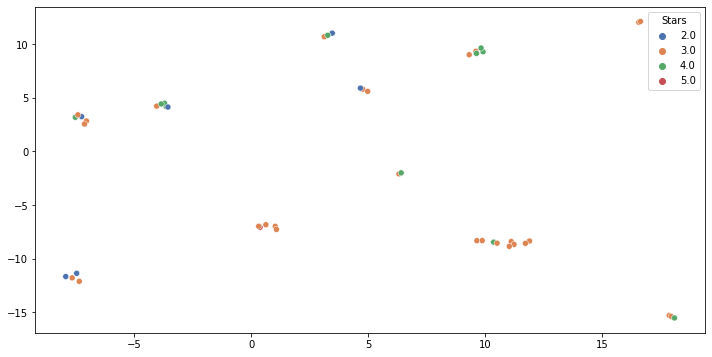

In [65]:
import random
random.seed = 7

ax = plot_hotel_embeddings(sim_hotels(random.choice(mymodel.wv.index_to_key),topn = 50),'star_rating')
ax.legend(title='Stars')
plt.show();

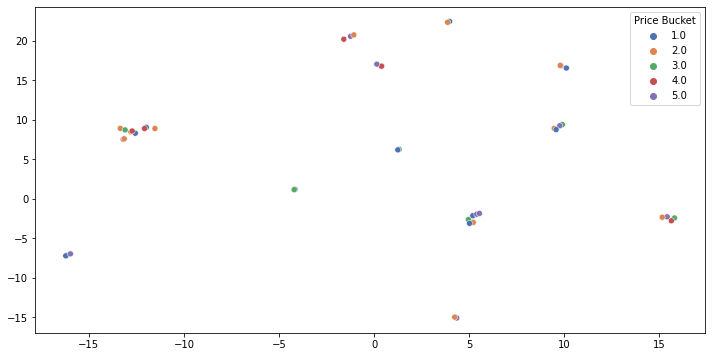

In [69]:
ax = plot_hotel_embeddings(sim_hotels(random.choice(mymodel.wv.index_to_key),topn = 50),'price_bucket')
ax.legend(title='Price Bucket')
plt.show();

In [70]:
df2.loc['2287779']

star_rating      NaN
review_rating    5.0
price_bucket     4.0
Name: 2287779, dtype: float64

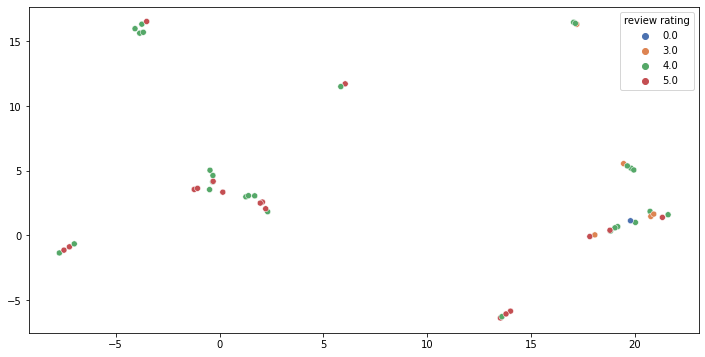

In [71]:
ax = plot_hotel_embeddings(sim_hotels(random.choice(mymodel.wv.index_to_key),topn =50),'review_rating')
ax.legend(title='review rating')
plt.show();

In [ ]:
df2.columns[0]

In [ ]:
for c in df2.columns:
    print(c)
    for i in range(0,len(sim_hotels('1943423'))):
        print(df2.loc[sim_hotels('1943423')[i]][c])

In [ ]:
sim_hotels('1943423')[0]

In [ ]:
sim_hotels('1943423')

In [ ]:
import random
random.seed(7)
hotel_to_plot = random.choice()